In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
passengerId = test['PassengerId']

titanic_df = train.append(test, ignore_index = True)

C:\Users\cesin\AppData\Local\Temp\ipykernel_39996\1308987510.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  titanic_df = train.append(test, ignore_index = True)


In [15]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [16]:
df = pd.DataFrame()

### Sobreviventes

In [17]:
titanic_df['Survived'].nunique()

2

In [18]:
titanic_df['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

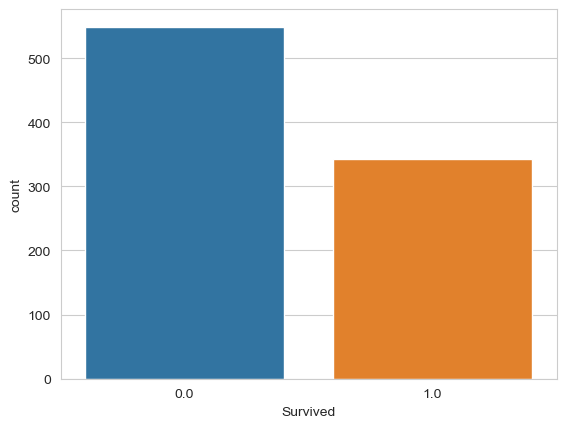

In [19]:
sns.countplot(data = titanic_df, x = "Survived")

In [20]:
df['Survived'] = titanic_df["Survived"]

In [21]:
df

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1304,NaN
1305,NaN
1306,NaN
1307,NaN


### Pclass

<Axes: xlabel='Pclass', ylabel='count'>

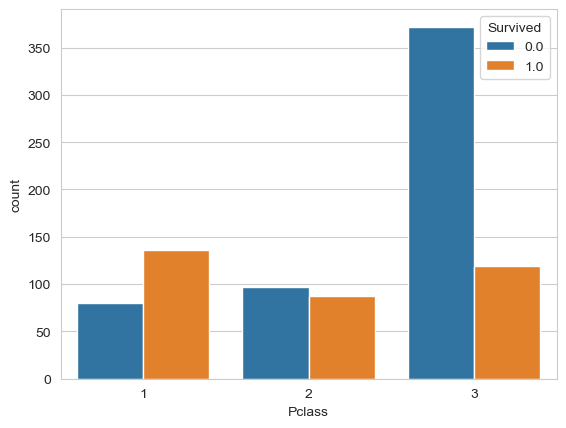

In [22]:
sns.countplot(data = titanic_df, x ="Pclass", hue="Survived")

In [23]:
df['Pclass'] = titanic_df["Pclass"]
df

,Survived,Pclass
0,0.0,3
1,1.0,1
2,1.0,3
3,1.0,1
4,0.0,3
...,...,...
1304,NaN,3
1305,NaN,1
1306,NaN,3
1307,NaN,3


### Sexo

In [24]:
titanic_df['Sex'] = titanic_df["Sex"].replace(['male','female'],[0,1])

<Axes: xlabel='Sex', ylabel='count'>

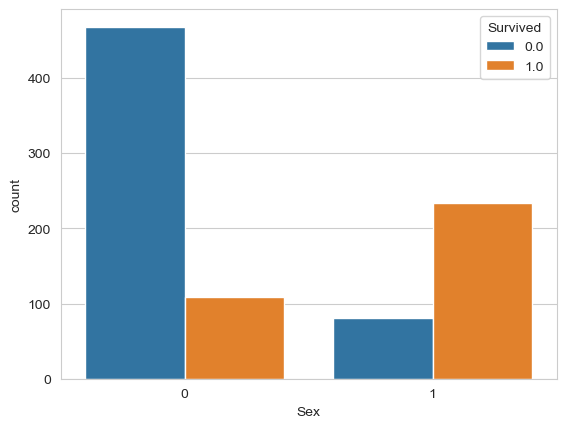

In [25]:
sns.countplot(data = titanic_df, x ="Sex", hue="Survived")

In [26]:
df["Sex"] = titanic_df["Sex"]
df

,Survived,Pclass,Sex
0,0.0,3,0
1,1.0,1,1
2,1.0,3,1
3,1.0,1,1
4,0.0,3,0
...,...,...,...
1304,NaN,3,0
1305,NaN,1,1
1306,NaN,3,0
1307,NaN,3,0


### Idade

In [27]:
titanic_df["Age_Group"] = pd.cut(titanic_df["Age"], bins=10)

<Axes: xlabel='Age'>

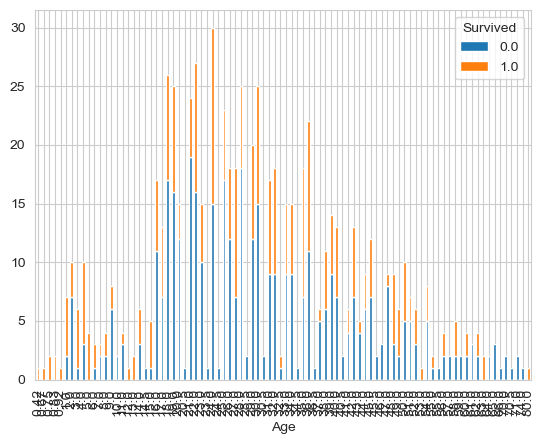

In [28]:
pivot_table = titanic_df.pivot_table(index="Age", columns="Survived", aggfunc="size", fill_value=0)
pivot_table.plot(kind="bar", stacked=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(0.0902, 8.153]'),
  Text(1, 0, '(8.153, 16.136]'),
  Text(2, 0, '(16.136, 24.119]'),
  Text(3, 0, '(24.119, 32.102]'),
  Text(4, 0, '(32.102, 40.085]'),
  Text(5, 0, '(40.085, 48.068]'),
  Text(6, 0, '(48.068, 56.051]'),
  Text(7, 0, '(56.051, 64.034]'),
  Text(8, 0, '(64.034, 72.017]'),
  Text(9, 0, '(72.017, 80.0]')])

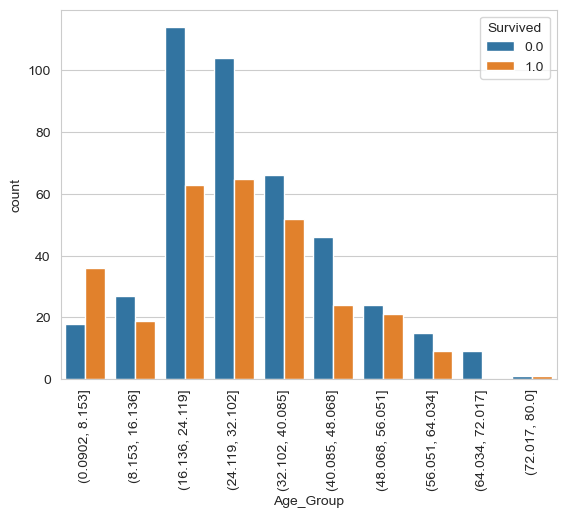

In [29]:
sns.countplot(data = titanic_df, x ="Age_Group", hue="Survived")
plt.xticks(rotation=90)

In [30]:
titanic_df["Age"].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0       22.0
1       38.0
2       26.0
3       35.0
4       35.0
        ... 
1304     NaN
1305    39.0
1306    38.5
1307     NaN
1308     NaN
Name: Age, Length: 1309, dtype: float64>

In [31]:
titanic_df.corr()

C:\Users\cesin\AppData\Local\Temp\ipykernel_39996\3484993026.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  titanic_df.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,-0.013406,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.124617,-0.408106,0.060832,0.018322,-0.558629
Sex,-0.013406,0.543351,-0.124617,1.000000,-0.063645,0.109609,0.213125,0.185523
Age,0.028814,-0.077221,-0.408106,-0.063645,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,0.109609,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,0.213125,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.185523,0.178740,0.160238,0.221539,1.000000


### - nesse ponto, foi feito uma correlação para saber qual variavel correlaciona mais com a idade (visto que tem uma grande quantidade de nulos). analisando nesse primeiro ponto, vemos que Pclass tem a maior correlação

In [32]:
titanic_df[titanic_df["Pclass"]==1]["Age"].mean()

39.15992957746479

In [33]:
titanic_df[titanic_df["Pclass"]==2]["Age"].mean()

29.506704980842912

In [34]:
titanic_df[titanic_df["Pclass"]==3]["Age"].mean()

24.81636726546906

In [35]:
titanic_df["Age"].isnull().sum()

263

### agora será criado uma função onde vou substituir os valores nulos das idades pela média de cada Pclass

In [36]:
for i in titanic_df.index:
    if pd.isnull(titanic_df["Age"][i]):
        if titanic_df["Pclass"][i] == 1:
            titanic_df["Age"][i] = round(titanic_df[titanic_df['Pclass'] == 1]["Age"].mean(), 0)
        elif titanic_df["Pclass"][i] == 2:
            titanic_df["Age"][i] = round(titanic_df[titanic_df['Pclass'] == 2]["Age"].mean(), 0)
        elif titanic_df["Pclass"][i] == 3:
            titanic_df["Age"][i] = round(titanic_df[titanic_df['Pclass'] == 3]["Age"].mean(), 0)
    else:
        continue
        

C:\Users\cesin\AppData\Local\Temp\ipykernel_39996\1265869954.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df["Age"][i] = round(titanic_df[titanic_df['Pclass'] == 3]["Age"].mean(), 0)
C:\Users\cesin\AppData\Local\Temp\ipykernel_39996\1265869954.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df["Age"][i] = round(titanic_df[titanic_df['Pclass'] == 2]["Age"].mean(), 0)
C:\Users\cesin\AppData\Local\Temp\ipykernel_39996\1265869954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [37]:
titanic_df[titanic_df["Pclass"] == 1]["Age"].isnull().sum()

0

In [38]:
df["Age"] = titanic_df["Age"]
df.head(10)

,Survived,Pclass,Sex,Age
0,0.0,3,0,22.0
1,1.0,1,1,38.0
2,1.0,3,1,26.0
3,1.0,1,1,35.0
4,0.0,3,0,35.0
5,0.0,3,0,25.0
6,0.0,1,0,54.0
7,0.0,3,0,2.0
8,1.0,3,1,27.0
9,1.0,2,1,14.0


### Irmãos e esposos

<Axes: xlabel='SibSp', ylabel='count'>

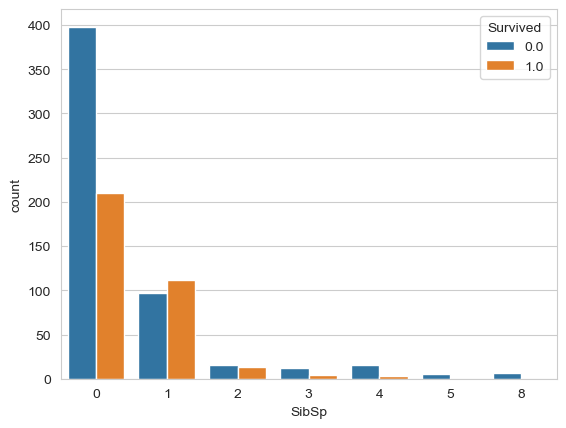

In [40]:
sns.countplot(data = titanic_df, x ="SibSp", hue="Survived")

In [41]:
df["SibSp"] = titanic_df["SibSp"]
df

,Survived,Pclass,Sex,Age,SibSp
0,0.0,3,0,22.0,1
1,1.0,1,1,38.0,1
2,1.0,3,1,26.0,0
3,1.0,1,1,35.0,1
4,0.0,3,0,35.0,0
...,...,...,...,...,...
1304,NaN,3,0,25.0,0
1305,NaN,1,1,39.0,0
1306,NaN,3,0,38.5,0
1307,NaN,3,0,25.0,0


### Filhos Pais/Mães

<Axes: xlabel='Parch', ylabel='count'>

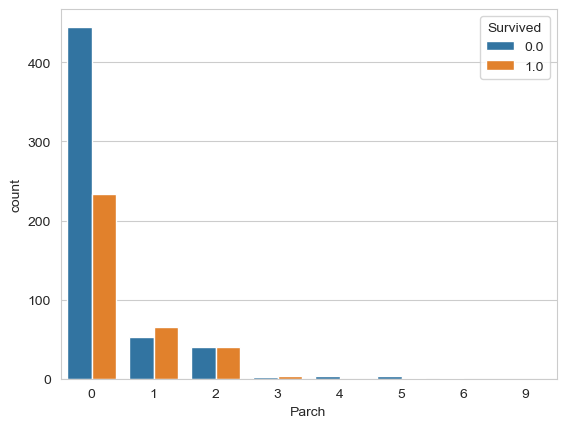

In [42]:
sns.countplot(data = titanic_df, x ="Parch", hue="Survived")

In [43]:
df["Parch"] = titanic_df["Parch"]
df

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0.0,3,0,22.0,1,0
1,1.0,1,1,38.0,1,0
2,1.0,3,1,26.0,0,0
3,1.0,1,1,35.0,1,0
4,0.0,3,0,35.0,0,0
...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0
1305,NaN,1,1,39.0,0,0
1306,NaN,3,0,38.5,0,0
1307,NaN,3,0,25.0,0,0


### Aqui nesse ponto vou criar uma coluna "Tamanho da familia" utilizando as colunas de SibSp e Parch

In [46]:
titanic_df["FamilySize"] = titanic_df['SibSp'] + titanic_df["Parch"] + 1
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,FamilySize
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.136, 24.119]",2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,"(32.102, 40.085]",2
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(24.119, 32.102]",1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,"(32.102, 40.085]",2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,"(32.102, 40.085]",1
5,6,0.0,3,"Moran, Mr. James",0,25.0,0,0,330877,8.4583,NaN,Q,NaN,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,"(48.068, 56.051]",1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,"(0.0902, 8.153]",5
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,"(24.119, 32.102]",3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,"(8.153, 16.136]",2


In [48]:
df['FamilySize'] = titanic_df["FamilySize"]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize
0,0.0,3,0,22.0,1,0,2
1,1.0,1,1,38.0,1,0,2
2,1.0,3,1,26.0,0,0,1
3,1.0,1,1,35.0,1,0,2
4,0.0,3,0,35.0,0,0,1
...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0,1
1305,NaN,1,1,39.0,0,0,1
1306,NaN,3,0,38.5,0,0,1
1307,NaN,3,0,25.0,0,0,1


### Preço da tarifa

<Axes: xlabel='Fare', ylabel='count'>

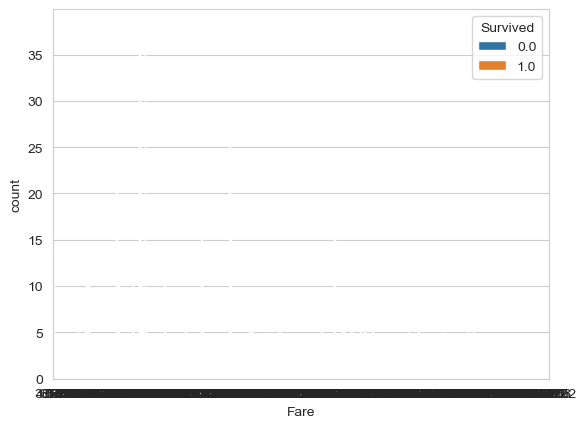

In [54]:
sns.countplot(data = titanic_df, x ="Fare", hue="Survived")

#### Nesse ponto, o gráfico escolhido não ficou legal, cabe achar alguma outra forma de melhorar essa apresentação

<Axes: xlabel='Fare', ylabel='Count'>

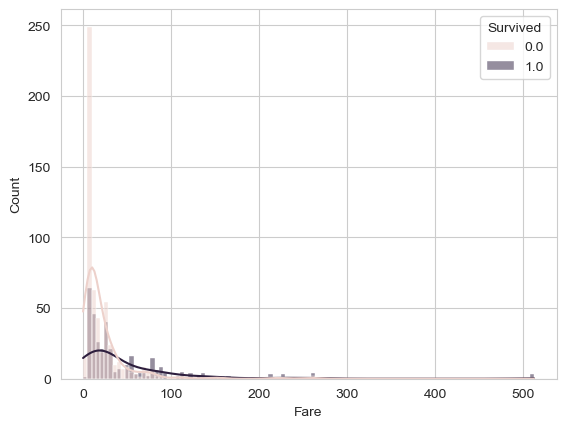

In [58]:
sns.histplot(data = titanic_df, x ="Fare", hue="Survived", kde=True)

##### pretendo melhorar esse gráfico no futuro

##### agora avaliar de onde veio a pessoa com o ticket nulo

In [59]:
titanic_df[titanic_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,FamilySize
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,S,"(56.051, 64.034]",1


In [60]:
titanic_df[titanic_df["Pclass"] == 3]["Fare"].mean()

13.302888700564973

#### vou subistituir o valor nulo pela média encontrada dos tripulantes da mesma classe

In [62]:
titanic_df["Fare"].fillna(titanic_df[titanic_df["Pclass"] == 3]["Fare"].mean(), inplace=True)

In [63]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
Age_Group       263
FamilySize        0
dtype: int64

##### agora com o nulo resolvido, colocarei a coluna no meu dataframe

In [64]:
df["Fare"] = titanic_df["Fare"]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare
0,0.0,3,0,22.0,1,0,2,7.2500
1,1.0,1,1,38.0,1,0,2,71.2833
2,1.0,3,1,26.0,0,0,1,7.9250
3,1.0,1,1,35.0,1,0,2,53.1000
4,0.0,3,0,35.0,0,0,1,8.0500
...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0,1,8.0500
1305,NaN,1,1,39.0,0,0,1,108.9000
1306,NaN,3,0,38.5,0,0,1,7.2500
1307,NaN,3,0,25.0,0,0,1,8.0500


### Cabines

#### aqui tem um pequeno problema por possuir mais de 1000 nulos, no momento não irei utilizar

### Embarque

<Axes: xlabel='Embarked', ylabel='count'>

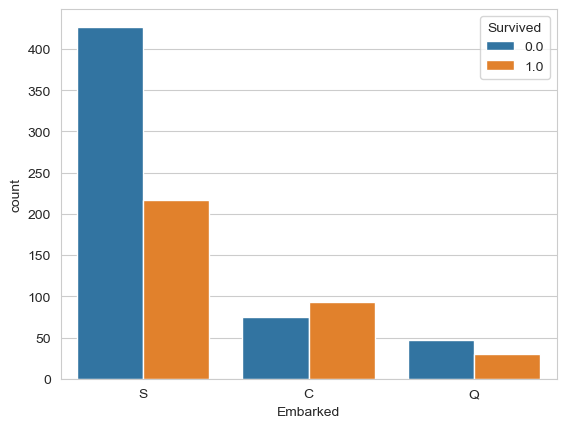

In [65]:
sns.countplot(data = titanic_df, x ="Embarked", hue="Survived")

In [66]:
titanic_df["Embarked"].isnull().sum()

2

In [69]:
titanic_df[titanic_df["Embarked"] == "S"]["Survived"].mean()

0.33695652173913043

#### Aqui, 33% das pessoas que embarcaram no portão S sobreviveram

In [70]:
titanic_df[titanic_df["Embarked"] == "C"]["Survived"].mean()

0.5535714285714286

In [71]:
titanic_df[titanic_df["Embarked"] == "Q"]["Survived"].mean()

0.38961038961038963

In [72]:
titanic_df[titanic_df["Embarked"] == "S"]["Pclass"].mean()

2.3479212253829322

In [73]:
titanic_df[titanic_df["Embarked"] == "C"]["Pclass"].mean()

1.8518518518518519

In [74]:
titanic_df[titanic_df["Embarked"] == "Q"]["Pclass"].mean()

2.894308943089431

In [75]:
titanic_df[titanic_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,FamilySize
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN,"(32.102, 40.085]",1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN,"(56.051, 64.034]",1


#### Aqui descobrimos que os 2 valores nulos dos embarques são pessoas de uma mesma Pclass, mesma cabine e mesmo ticket

In [77]:
titanic_df["Embarked"].fillna("C",inplace=True)

#### Nesse ponto, optei por colocar as 2 pessoas no portão C, pelo valor de Pclass estar mais próximo da média do portão C

In [78]:
titanic_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Age_Group       263
FamilySize        0
dtype: int64

In [80]:
df["Embarked"] = titanic_df["Embarked"]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked
0,0.0,3,0,22.0,1,0,2,7.2500,S
1,1.0,1,1,38.0,1,0,2,71.2833,C
2,1.0,3,1,26.0,0,0,1,7.9250,S
3,1.0,1,1,35.0,1,0,2,53.1000,S
4,0.0,3,0,35.0,0,0,1,8.0500,S
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0,1,8.0500,S
1305,NaN,1,1,39.0,0,0,1,108.9000,C
1306,NaN,3,0,38.5,0,0,1,7.2500,S
1307,NaN,3,0,25.0,0,0,1,8.0500,S


### Nome

#### a primeira idéia aqui é separar os títulos das pessoas do nome delas

In [81]:
titanic_df["Name"]

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

#### encontro um padrão que o título aparece entre , e .

In [82]:
titanic_df["Designation"] = titanic_df["Name"].apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [83]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,FamilySize,Designation
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.136, 24.119]",2,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,"(32.102, 40.085]",2,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(24.119, 32.102]",1,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,"(32.102, 40.085]",2,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,"(32.102, 40.085]",1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",0,25.0,0,0,A.5. 3236,8.0500,NaN,S,NaN,1,Mr
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C,"(32.102, 40.085]",1,Dona
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,"(32.102, 40.085]",1,Mr
1307,1308,NaN,3,"Ware, Mr. Frederick",0,25.0,0,0,359309,8.0500,NaN,S,NaN,1,Mr


#### criei uma coluna só com o título desses passageiros

In [84]:
titanic_df["Designation"].nunique()

18

In [85]:
titanic_df["Designation"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [86]:
titanic_df["Designation"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Designation, dtype: int64

#### Nesse ponto, quero pesquisar mais afundo em como posso agrupar algumas dessas variáveis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Don'),
  Text(5, 0, 'Rev'),
  Text(6, 0, 'Dr'),
  Text(7, 0, 'Mme'),
  Text(8, 0, 'Ms'),
  Text(9, 0, 'Major'),
  Text(10, 0, 'Lady'),
  Text(11, 0, 'Sir'),
  Text(12, 0, 'Mlle'),
  Text(13, 0, 'Col'),
  Text(14, 0, 'Capt'),
  Text(15, 0, 'the Countess'),
  Text(16, 0, 'Jonkheer'),
  Text(17, 0, 'Dona')])

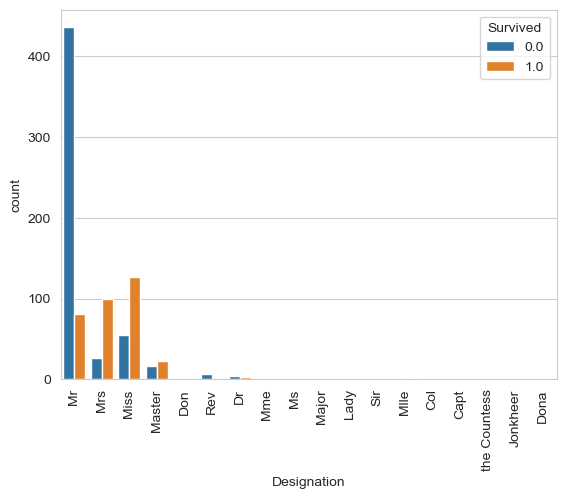

In [92]:
sns.countplot(data = titanic_df, x ="Designation", hue="Survived")
plt.xticks(rotation=90)

In [88]:
df["Designation"] = titanic_df["Designation"]
df

,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,Fare,Embarked,Designation
0,0.0,3,0,22.0,1,0,2,7.2500,S,Mr
1,1.0,1,1,38.0,1,0,2,71.2833,C,Mrs
2,1.0,3,1,26.0,0,0,1,7.9250,S,Miss
3,1.0,1,1,35.0,1,0,2,53.1000,S,Mrs
4,0.0,3,0,35.0,0,0,1,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,0,25.0,0,0,1,8.0500,S,Mr
1305,NaN,1,1,39.0,0,0,1,108.9000,C,Dona
1306,NaN,3,0,38.5,0,0,1,7.2500,S,Mr
1307,NaN,3,0,25.0,0,0,1,8.0500,S,Mr
